### **Célula para inicializar as importações e funções de módulo**

In [12]:
#Importações
import sys
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Adicionando o caminho do módulo de classificacao
sys.path.append(os.path.abspath(".."))

#importação das funções do módulo
from classificacao import loading_date, choose_k, random_validator, view_scatter_plot, bayes_validator


### **Célula para carregar os dados do CSV e visualiza-los**

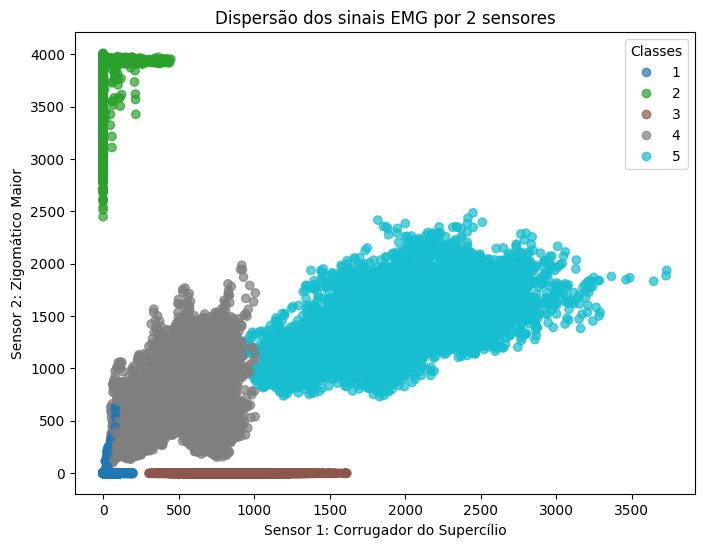

In [6]:
# Carregar dados do CSV
X, y = loading_date("data/EMGDataset.csv")

#Visualizar os dados do CSV
view_scatter_plot(X, y)

### **Célula para escolher melhor K com K-Fold**

In [7]:
# Definir valores de k a testar
k_values = [1, 7, 11, 17, 23, 39, 101, 501, 1001]

# Escolher melhor k por meio do K-Fold
better_k, results = choose_k(X, y, k_values)

# Exibir resultados 
results_df =pd.DataFrame.from_dict(results, orient='index', columns=["Acurácia média"]).sort_index()
display(results_df)
print(f"\nMelhor k encontrado: {better_k}")

,Acurácia média
1,0.99920
7,0.99896
11,0.99886
17,0.99866
23,0.99840
39,0.99824
101,0.99816
501,0.99782
1001,0.99622



Melhor k encontrado: 1


### **Célula para validação aleatória método KNN e mostrar suas estatísticas**

In [8]:
# Rodar validação aleatória
statistics_knn, better_conf_knn, worse_conf_knn = random_validator(X, y, better_k, rounds=500)

# Estatísticas
print("\nEstatísticas validação aleatória de 500 rodadas:")
pd.DataFrame(statistics_knn, index=["Estatísticas"]).T


Estatísticas validação aleatória de 500 rodadas:


,Estatísticas
Média,0.999174
Desvio-padrão,0.000269
Maior valor,0.999800
Menor valor,0.998200


### **Célula para exibição das matrizes de confusão (KNN)**

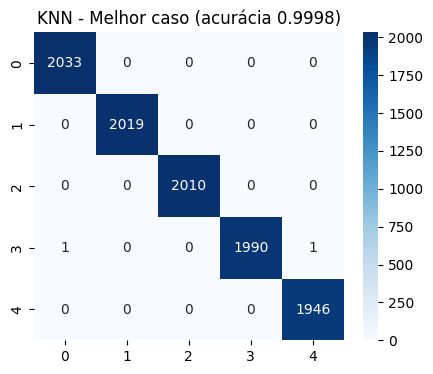

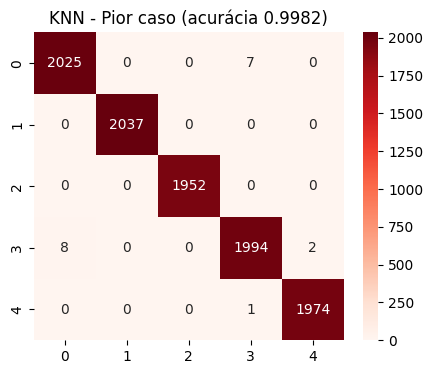

In [13]:
# Melhor caso
acc_best, conf_best = better_conf_knn
plt.figure(figsize=(5,4))
sns.heatmap(conf_best, annot=True, fmt="d", cmap="Blues")
plt.title(f"KNN - Melhor caso (acurácia {acc_best:.4f})")
plt.show()

# Pior caso
acc_worst, conf_worst = worse_conf_knn
plt.figure(figsize=(5,4))
sns.heatmap(conf_worst, annot=True, fmt="d", cmap="Reds")
plt.title(f"KNN - Pior caso (acurácia {acc_worst:.4f})")
plt.show()

### **Célula para validação aleatória método BAYES e mostrar suas estatísticas**

In [14]:
statistics_bayes, better_conf_bayes, worse_conf_bayes = bayes_validator(X, y)
pd.DataFrame(statistics_bayes, index=["estatísticas"]).T

,estatísticas
Média,0.989005
Desvio-padrão,0.001125
Maior valor,0.992100
Menor valor,0.985700


### **Célula para exibição das matrizes de confusão (BAYES)**

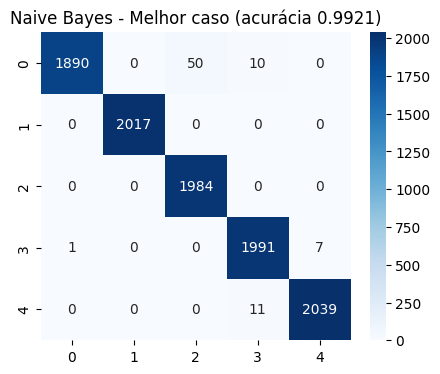

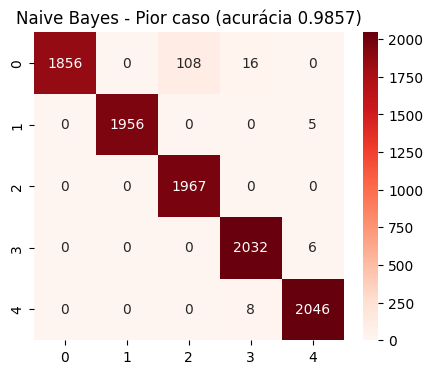

In [15]:
# Melhor caso Bayes
acc_best, conf_best = better_conf_bayes
plt.figure(figsize=(5,4))
sns.heatmap(conf_best, annot=True, fmt="d", cmap="Blues")
plt.title(f"Naive Bayes - Melhor caso (acurácia {acc_best:.4f})")
plt.show()

# Pior caso Bayes
acc_worst, conf_worst = worse_conf_bayes
plt.figure(figsize=(5,4))
sns.heatmap(conf_worst, annot=True, fmt="d", cmap="Reds")
plt.title(f"Naive Bayes - Pior caso (acurácia {acc_worst:.4f})")
plt.show()
